In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from scipy import stats
from scipy import special
from iminuit import Minuit, cost

In [16]:
import iminuit
iminuit.__version__

'2.20.0'

# Unbinned data

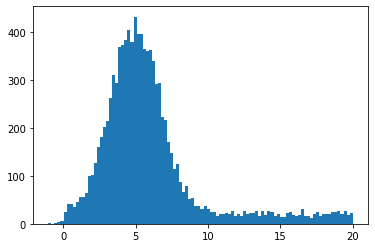

10000


In [13]:
#make data to fit
n = 10000 #total number of events
truth = np.array((0.8, #proportion pulled from gaussian dist
                  0.2, #proportion pulled from uniform dist
                  5.0, #gaussian mean 
                  1.7))#gaussian std

rng = np.random.default_rng(1)
s = rng.normal(truth[2], truth[3], size=int(n * truth[0])) #normal distribution
b = rng.uniform(0, 20, size=int(n * truth[1])) #uniform distribution
pts = np.append(s, b) #put both distributions in the same dataset

plt.hist(pts, bins=100)
plt.show()
print(len(pts))

In [14]:
def fit(c):
    m = Minuit(c, b=0, mu=1, sigma=0.1) # enter cost function and initial paramters
    m.limits["mu", "sigma"] = (0, 20) #set limits if needed
    m.limits["b"] = [0, 1] #set limits if needed
    m.migrad() #gradient descent
    assert m.valid
    return m

def density(x, b, mu, sigma):
    xrange = (0, 20)
    s1 = (1-b) * n * np.diff(stats.norm.cdf(xrange, mu, sigma))
    b1 = b * n * np.diff(stats.uniform.cdf(xrange))
    return s1 + b1, (
        (1-b)*n*stats.norm.pdf(x, mu, sigma) +
        b*n*stats.uniform.pdf(x, *xrange)
    )


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.164e+05                 │              Nfcn = 203              │
│ EDM = 2.64e-06 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬─────

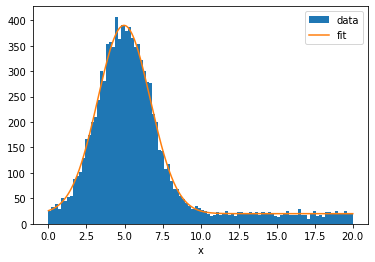

In [15]:
n = len(pts)
m = fit(cost.ExtendedUnbinnedNLL(pts, density)) #establish the cost function and fit the data
par_names = [m.params[i].name for i in range(m.npar)]
results = {np.inf: (np.array(m.values), np.array(m.errors), m.fmin.time)} #set up results dictionary
print(m)

xrange = (0,20) #plot the results
xm = np.linspace(xrange[0], xrange[1], 1000)
_, ym = density(xm, *m.values)
binsz = 100
plt.hist(pts, bins=binsz, range=xrange, label="data")
dx = xrange[1]/binsz
plt.plot(xm, ym*dx, label="fit")
plt.legend()
plt.xlabel("x")
plt.show()


# Binned data

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 185.8 (chi2/ndof = 0.9)    │              Nfcn = 270              │
│ EDM = 2.79e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ b     │   0.204   │   0.006   │            │            │    0    │    1    │       │
│ 1 │ mu    │   8.994   │   0.021   │            │            │    0    │   20    │       │
│ 2 │ sigma │   1.675   │   0.019   │            │            │    0    │   20    │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────┐
│       │         b        mu     sigma │
├───────┼───────────────────────────────┤
│     b │  3.67e-05 -8.84e-07  -4.4e-05 │
│    mu │ -8.84e-07   0.00046  3.57e-06 │
│ sigma │  -4.4e-05  3.57e-06  0.000355 │
└───────┴───────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 83.41 (chi2/ndof = 0.9)    │              Nfcn = 251              │
│ EDM = 1.55e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ b     │   0.203   │   0.006   │            │            │    0    │    1    │       │
│ 1 │ mu    │   8.994   │   0.021   │            │            │    0    │   20    │       │
│ 2 │ sigma │   1.675   │   0.019   │            │            │    0    │   20    │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────┐
│       │         b        mu     sigma │
├───────┼───────────────────────────────┤
│     b │  3.67e-05 -9.31e-07  -4.4e-05 │
│    mu │ -9.31e-07   0.00046  3.81e-06 │
│ sigma │  -4.4e-05  3.81e-06  0.000355 │
└───────┴───────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 42.54 (chi2/ndof = 0.9)    │              Nfcn = 209              │
│ EDM = 3.15e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ b     │   0.203   │   0.006   │            │            │    0    │    1    │       │
│ 1 │ mu    │   8.993   │   0.021   │            │            │    0    │   20    │       │
│ 2 │ sigma │   1.675   │   0.019   │            │            │    0    │   20    │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────┐
│       │         b        mu     sigma │
├───────┼───────────────────────────────┤
│     b │  3.67e-05 -9.34e-07 -4.42e-05 │
│    mu │ -9.34e-07  0.000461     4e-06 │
│ sigma │ -4.42e-05     4e-06  0.000358 │
└───────┴───────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 11.39 (chi2/ndof = 0.7)    │              Nfcn = 178              │
│ EDM = 4.92e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ b     │   0.204   │   0.006   │            │            │    0    │    1    │       │
│ 1 │ mu    │   8.991   │   0.022   │            │            │    0    │   20    │       │
│ 2 │ sigma │   1.679   │   0.020   │            │            │    0    │   20    │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────┐
│       │         b        mu     sigma │
├───────┼───────────────────────────────┤
│     b │  3.74e-05 -3.02e-07 -4.69e-05 │
│    mu │ -3.02e-07  0.000477 -7.81e-08 │
│ sigma │ -4.69e-05 -7.81e-08  0.000382 │
└───────┴───────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.094 (chi2/ndof = 0.4)    │              Nfcn = 330              │
│ EDM = 2.26e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ b     │   0.202   │   0.006   │            │            │    0    │    1    │       │
│ 1 │ mu    │   8.991   │   0.023   │            │            │    0    │   20    │       │
│ 2 │ sigma │   1.688   │   0.021   │            │            │    0    │   20    │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────┐
│       │         b        mu     sigma │
├───────┼───────────────────────────────┤
│     b │  3.89e-05 -1.52e-07 -5.33e-05 │
│    mu │ -1.52e-07  0.000524  6.29e-07 │
│ sigma │ -5.33e-05  6.29e-07  0.000453 │
└───────┴───────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 100.7 (chi2/ndof = 50.3)   │              Nfcn = 276              │
│ EDM = 4.31e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ b     │   0.253   │   0.006   │            │            │    0    │    1    │       │
│ 1 │ mu    │   8.008   │   0.015   │            │            │    0    │   20    │       │
│ 2 │ sigma │   0.014   │   0.027   │            │            │    0    │   20    │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────┐
│       │        b       mu    sigma │
├───────┼────────────────────────────┤
│     b │ 3.58e-05  4.7e-07  4.8e-07 │
│    mu │  4.7e-07  0.00024 0.000421 │
│ sigma │  4.8e-07 0.000421 0.000737 │
└───────┴────────────────────────────┘

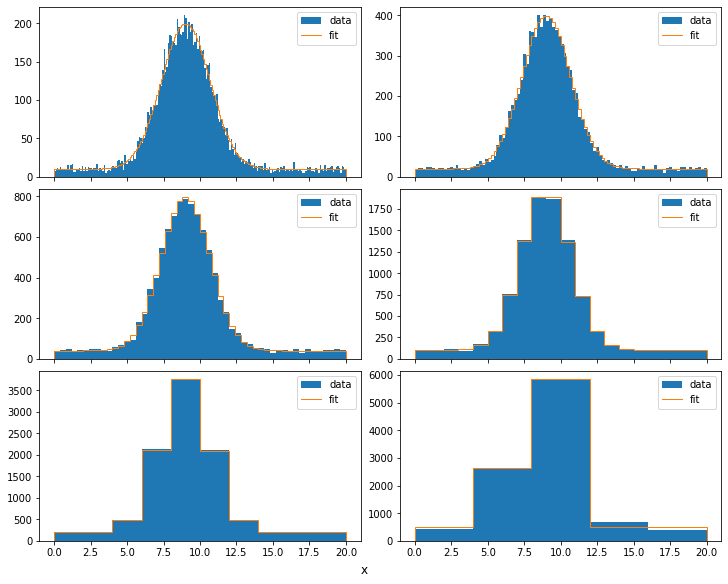

In [38]:
def integral(xe, b, mu, sigma):
    return (1-b) * n * stats.norm.cdf(xe, mu, sigma) + b * n * stats.uniform.cdf(xe, 0, 20)

fig, ax = plt.subplots(3, 2, figsize=(10, 8), sharex=True, constrained_layout=True)
xrange = (0,20)

for axi, bins in zip(ax.flat, (200, 100, 50, 20, 10, 5)): # loop through each of these bin numbers and fit the data
    w, xe = np.histogram(pts, bins=bins, range=xrange) # returns weight (counts in bin) and x-edges (bin edges)
    c = cost.ExtendedBinnedNLL(w, xe, integral) # set up the cost function
    m = fit(c) # fit the binned data
    display(m)
    axi.stairs(w, xe, fill=True, label="data")
    axi.stairs(np.diff(integral(xe, *m.values)), xe, label="fit")
    axi.legend()
    results[bins] = (np.array(m.values), np.array(m.errors), m.fmin.time) #add results to dictionary
fig.supxlabel("x");



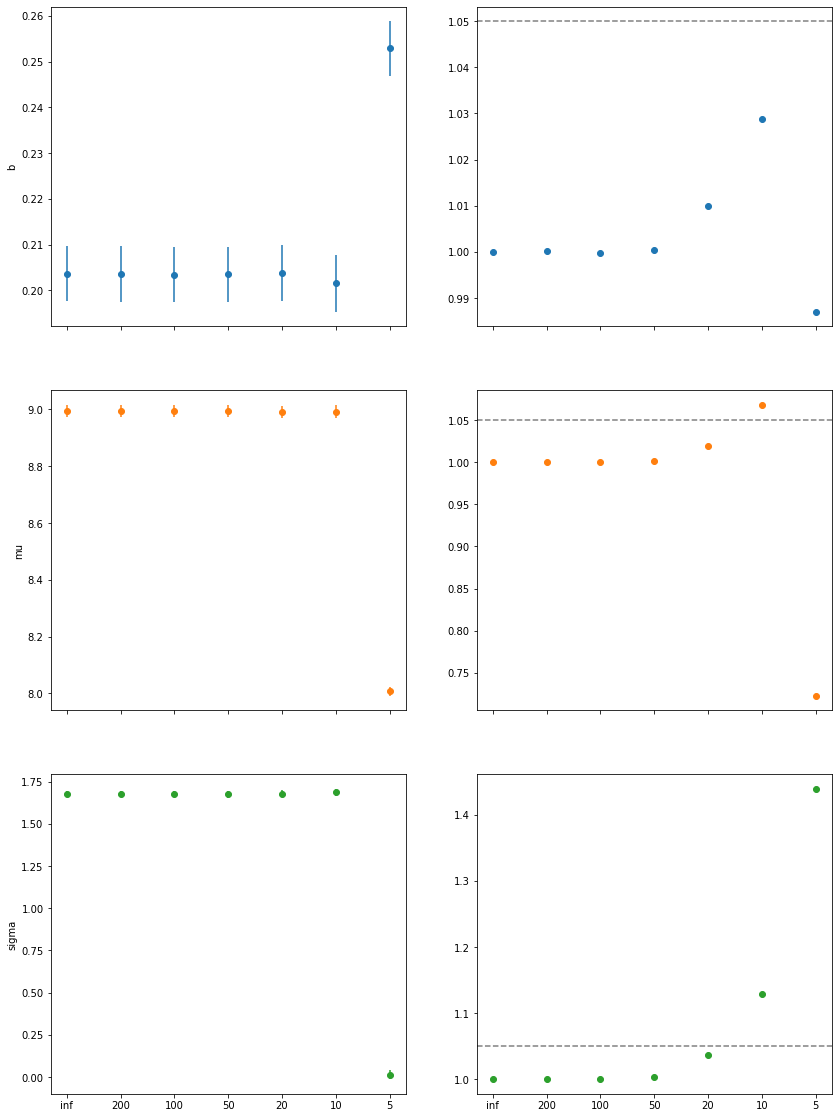

In [40]:
# explore the results of binning on the data

npar = len(results[np.inf][0])

fig, ax = plt.subplots(npar, 2, sharex=True, figsize=(14, 20))  # change in 
for j, (k, (v, e, _)) in enumerate(results.items()):
    for i, (vi, ei) in enumerate(zip(v, e)):
        c = f"C{i}"
        ax[i, 0].errorbar(j, vi, ei, color=c, fmt="o")
        ax[i, 0].set_ylabel(par_names[i])
        einf = results[np.inf][1][i]
        ax[i, 1].plot(j, ei /einf, "o", color=c)
for i in range(npar):
    ax[i, 1].axhline(1.05, ls="--", color="0.5")
plt.xticks(np.arange(7), [f"{x}" for x in results.keys()]);